# Cup Anemometer Calibration and Wind Data Analysis

## Project Overview:
- Calibrates cup anemometer using wind tunnel calibration data
- Derives transfer function: Wind Speed = Slope * Frequency + Intercept  
- Applies calibration to field wind measurements
- Calculates wind statistics and turbulence intensity

## Key Results:
- Calibration Coefficients: Slope = 0.6085, Intercept = 0.1535
- Mean Wind Speed: 4.92 m/s
- Turbulence Intensity: 12.82%

**Author:** Josué Ríos C.  


In [1]:
###### Load calibration data from CSV file
# Data format: [frequency (Hz), differential pressure (Pa)]
import csv

with open('CalibrationData.csv', newline='') as csv_file:
    csv_read = csv.reader(csv_file, delimiter=',')
    data = list(csv_read)

# Extract frequency and pressure data, remove header row
a = []  # Frequency data (Hz)
b = []  # Differential pressure data (Pa)


for row in data:
    a.append(row[0].strip())
    b.append(row[1].strip())

aAttr = a[0]  # Store attribute name for plotting
bAttr = b[0]  # Store attribute name for plotting
a.remove(a[0])  # Remove header
b.remove(b[0])  # Remove header

In [2]:
# Convert string data to float for numerical processing
c = list(map(float, b))
a = list(map(float, a))

In [3]:
# Environmental conditions during calibration
temp = 27.2
B = 1007

# Calculate air density using ideal gas law correction
# ρ = 1.225 * (288.15/(T + 273.15)) * (P/1013.3)
roh = (1.225)*(288.15/(temp+273.15))*(B/1013.3)

# Calculate reference wind speed from differential pressure
# V = √(2 * ΔP / ρ) - Bernoulli's equation for pitot tube
d = [(2*x/roh)**0.5 for x in c]

Text(0, 0.5, ' V[m/s]')

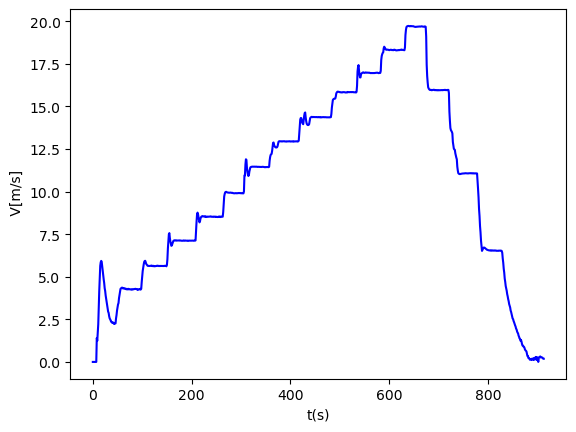

In [4]:
import matplotlib.pyplot as mp

# Plot time series of reference wind speeds from pitot tube
Absd = [abs(x) for x in d]
tArray = list(range(0, len(Absd)))
mp.plot(tArray,Absd, 'blue')
mp.xlabel('t(s)')
mp.ylabel(' V[m/s]')

Text(0, 0.5, 'F [Hz]')

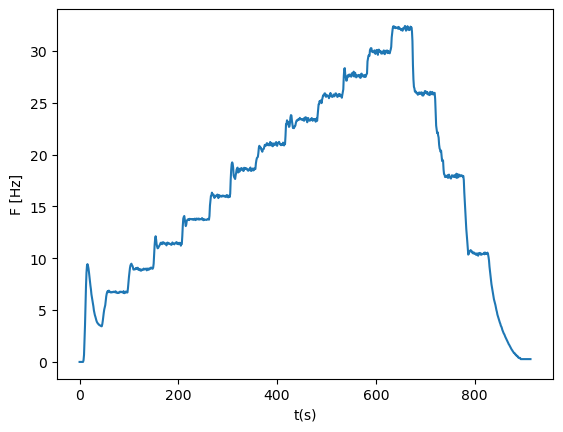

In [5]:
# Plot time series of cup rotational frequencies
mp.plot(tArray, a)
mp.xlabel('t(s)')
mp.ylabel(aAttr)


Text(0.5, 0, 'cup frequency [Hz]')

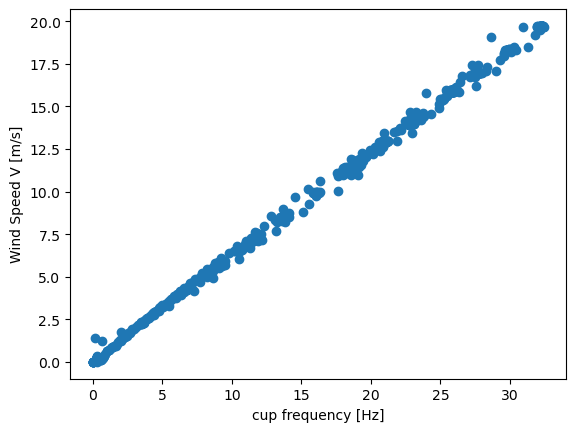

In [6]:
# Create scatter plot: Cup Frequency vs Wind Speed
mp.scatter(a, Absd)
mp.ylabel('Wind Speed V [m/s]')
mp.xlabel('cup frequency [Hz]')

In [7]:
from scipy.stats import linregress

# Perform linear regression to find transfer function: 
# V = slope*f + intercept
slope, intercept, r_value, p_value, std_err = linregress(a, Absd)

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.6085034892283274
Intercept: 0.15346223962523808


In [8]:
import csv

# Load field measurement data
with open('windata.csv', newline='') as csv_file:
    csv_read = csv.reader(csv_file, delimiter=',')
    data = list(csv_read)

f = []  # Timestamps
e = []  # Cup frequencies from field measurements

for row in data:
    f.append(row[0].strip())
    e.append(row[1].strip())

fAttr = f[0]
eAttr = e[0]
f.remove(f[0])
e.remove(e[0])

In [9]:
# Convert timestamps to numerical format
from datetime import datetime
e = list(map(float,e))  # Convert frequencies to float
t = [datetime.strptime(x, "%Y/%m/%d %H:%M:%S") for x in f]  # Parse timestamps
auxTime = [int(x.timestamp()) for x in t]  # Convert to Unix timestamp
t = list(map(float,auxTime))

In [10]:
# Normalize time to start from zero
baseTime = t[0]
stdTime= [x-baseTime for x in t]
temp = 27.2
B = 1007
roh = (1.225)*(288.15/(temp+273.15))*(B/1013.3)
windSpeed=[((0.6085*x)+0.153) for x in e]

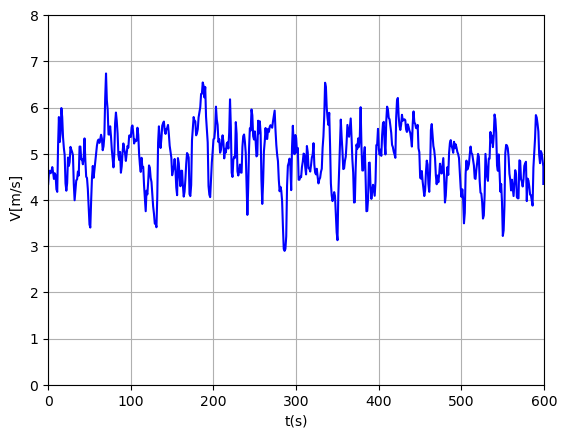

In [11]:
import matplotlib.pyplot as mp

# Plot calibrated wind speed time series
mp.plot(stdTime,windSpeed, 'blue')
mp.xlim(0,600)  # Focus on first 10 minutes
mp.xlabel('t(s)')
mp.ylim(0,8)
mp.ylabel(' V[m/s]')
mp.grid(True)

In [12]:
from statistics import mean 
from statistics import stdev

# Calculate wind statistics
MeanWS = mean(windSpeed)
Stdev = stdev(windSpeed)
IntTurbulence = Stdev*100/MeanWS

print(f"Mean Wind Speed: {MeanWS:.2f} m/s")
print(f"Standard Deviation: {Stdev:.2f} m/s") 
print(f"Turbulence Intensity: {IntTurbulence:.2f}%")

Mean Wind Speed: 4.92 m/s
Standard Deviation: 0.63 m/s
Turbulence Intensity: 12.82%
